# Import Libraries

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# About Dataset

* EmployeeID: Unique identifier for each employee.
* FirstName: The first name of the employee.
* LastName: The last name of the employee.
* Gender: The gender of the employee.
* Age: The age of the employee.
* BusinessTravel: The frequency of business travel for the employee.
* Department: The department in which the employee works.
* DistanceFromHome (KM): The distance between the employee's home and workplace in kilometers.
* State: The state in which the employee resides.
* Ethnicity: The ethnicity of the employee.
* MaritalStatus: The marital status of the employee.
* Salary: The annual salary of the employee.
* StockOptionLevel: The level of stock options granted to the employee.
* OverTime: Whether the employee works overtime (Yes/No).
* HireDate: The date the employee was hired.
* Attrition: Whether the employee has left the company (Yes/No).
* YearsAtCompany: The number of years the employee has been with the company.
* YearsInMostRecentRole: The number of years the employee has been in their most recent role.
* YearsSinceLastPromotion: The number of years since the employee's last promotion.
* YearsWithCurrManager: The number of years the employee has worked with their current manager.
* EducationLevelID: Unique identifier for the education level.
* EducationLevel: The level of education achieved, ranging from "No Formal Qualifications" to "Doctorate."


# Objective: 
* Build a machine learning model to predict employee attrition.

In [283]:
data=pd.read_csv('Employee.csv')

In [284]:
data

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,...,Single,38508,0,No,2022-12-26,No,0,0,0,0
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,...,Single,92995,3,No,2022-12-30,No,0,0,0,0
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,...,Single,63375,0,No,2022-12-30,No,0,0,0,0
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,Married,46521,0,No,2022-12-30,No,0,0,0,0


In [285]:
data.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [286]:
data.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [287]:
data.tail()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,...,Single,38508,0,No,2022-12-26,No,0,0,0,0
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,...,Single,92995,3,No,2022-12-30,No,0,0,0,0
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,...,Single,63375,0,No,2022-12-30,No,0,0,0,0
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,Married,46521,0,No,2022-12-30,No,0,0,0,0
1469,84D4-D4C3,Naoma,Hebbard,Female,20,No Travel,Technology,28,CA,Black or African American,...,Married,38258,0,No,2022-12-31,No,0,0,0,0


In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

# Key points
* Data Completeness: All columns have 1,470 non-null entries, indicating no missing data, which simplifies analysis.
* Data Types:
    * Categorical Variables: Gender, BusinessTravel, Department, State, Ethnicity, EducationField, JobRole, MaritalStatus, OverTime, Attrition.
    * Numerical Variables: Age, DistanceFromHome, Education, Salary, StockOptionLevel, YearsAtCompany, YearsInMostRecentRole, YearsSinceLastPromotion, YearsWithCurrManager.
    * Date Variable: HireDate.

In [289]:
data.describe()

,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,28.989796,22.502721,2.912925,112956.497959,0.793878,4.562585,2.293197,3.440816,2.239456
std,7.993055,12.811124,1.024165,103342.889222,0.852077,3.288048,2.539093,2.945194,2.505774
min,18.000000,1.000000,1.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,2.000000,43580.500000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,26.000000,22.000000,3.000000,71199.500000,1.000000,4.000000,1.000000,3.000000,1.000000
75%,34.000000,33.000000,4.000000,142055.750000,1.000000,7.000000,4.000000,6.000000,4.000000
max,51.000000,45.000000,5.000000,547204.000000,3.000000,10.000000,10.000000,10.000000,10.000000


In [290]:
data.describe(include='all')

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470,1470,1470,1470,1470.000000,1470,1470,1470.000000,1470,1470,...,1470,1470.000000,1470.000000,1470,1470,1470,1470.000000,1470.000000,1470.000000,1470.000000
unique,1470,1334,1441,4,NaN,3,3,NaN,3,7,...,3,NaN,NaN,2,1192,2,NaN,NaN,NaN,NaN
top,3012-1A41,Murdock,Ponten,Female,NaN,Some Travel,Technology,NaN,CA,White,...,Married,NaN,NaN,No,2016-10-04,No,NaN,NaN,NaN,NaN
freq,1,3,2,675,NaN,1043,961,NaN,875,860,...,624,NaN,NaN,1054,4,1233,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,28.989796,NaN,NaN,22.502721,NaN,NaN,...,NaN,112956.497959,0.793878,NaN,NaN,NaN,4.562585,2.293197,3.440816,2.239456
std,NaN,NaN,NaN,NaN,7.993055,NaN,NaN,12.811124,NaN,NaN,...,NaN,103342.889222,0.852077,NaN,NaN,NaN,3.288048,2.539093,2.945194,2.505774
min,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,20387.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,12.000000,NaN,NaN,...,NaN,43580.500000,0.000000,NaN,NaN,NaN,2.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,22.000000,NaN,NaN,...,NaN,71199.500000,1.000000,NaN,NaN,NaN,4.000000,1.000000,3.000000,1.000000
75%,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,33.000000,NaN,NaN,...,NaN,142055.750000,1.000000,NaN,NaN,NaN,7.000000,4.000000,6.000000,4.000000


In [291]:
data.describe(include='object')

,EmployeeID,FirstName,LastName,Gender,BusinessTravel,Department,State,Ethnicity,EducationField,JobRole,MaritalStatus,OverTime,HireDate,Attrition
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,1470,1334,1441,4,3,3,3,7,9,13,3,2,1192,2
top,3012-1A41,Murdock,Ponten,Female,Some Travel,Technology,CA,White,Computer Science,Sales Executive,Married,No,2016-10-04,No
freq,1,3,2,675,1043,961,875,860,440,327,624,1054,4,1233


# Checking null values

In [292]:
data.isnull().sum()

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

* No null values

# Checking duplicates in data

In [293]:
data.duplicated().sum()

0

* No duplicate values

# Converting datatype

In [294]:
data['HireDate']=data['HireDate'].astype('datetime64[ns]')

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeID               1470 non-null   object        
 1   FirstName                1470 non-null   object        
 2   LastName                 1470 non-null   object        
 3   Gender                   1470 non-null   object        
 4   Age                      1470 non-null   int64         
 5   BusinessTravel           1470 non-null   object        
 6   Department               1470 non-null   object        
 7   DistanceFromHome (KM)    1470 non-null   int64         
 8   State                    1470 non-null   object        
 9   Ethnicity                1470 non-null   object        
 10  Education                1470 non-null   int64         
 11  EducationField           1470 non-null   object        
 12  JobRole                  1470 non-

In [296]:
data.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


# Calculate the percentage of employees who left the company.

In [297]:
attrition_rate = data['Attrition'].value_counts(normalize=True) * 100
attrition_rate

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

# Analyze if factors like age affect attrition rates

In [298]:
data.groupby(['Attrition'])['Age'].mean()

Attrition
No     29.460665
Yes    26.540084
Name: Age, dtype: float64

# Analyze if factors like department affect attrition rates

In [299]:
data.groupby(['Attrition'])['Department'].value_counts(normalize=True)

Attrition  Department     
No         Technology         0.671533
           Sales              0.287105
           Human Resources    0.041363
Yes        Technology         0.561181
           Sales              0.388186
           Human Resources    0.050633
Name: proportion, dtype: float64

# Analyze if factors like job role affect attrition rates

In [300]:
data.groupby(['Attrition'])['JobRole'].value_counts(normalize=True)

Attrition  JobRole                  
No         Sales Executive              0.218978
           Software Engineer            0.200324
           Data Scientist               0.161395
           Machine Learning Engineer    0.110300
           Senior Software Engineer     0.099757
           Engineering Manager          0.059205
           Sales Representative         0.040552
           Analytics Manager            0.039740
           Manager                      0.028386
           HR Executive                 0.020276
           Recruiter                    0.012165
           HR Business Partner          0.005677
           HR Manager                   0.003244
Yes        Data Scientist               0.261603
           Sales Executive              0.240506
           Software Engineer            0.198312
           Sales Representative         0.139241
           Machine Learning Engineer    0.042194
           Recruiter                    0.037975
           Senior Software Engin

# Analyze if factors like salary affect attrition rates

In [301]:
data.groupby(['Attrition'])['Salary'].value_counts(normalize=True)

Attrition  Salary
No         26973     0.001622
           44082     0.001622
           44646     0.001622
           62828     0.001622
           65642     0.001622
                       ...   
Yes        341971    0.004219
           350525    0.004219
           377203    0.004219
           531629    0.004219
           539998    0.004219
Name: proportion, Length: 1460, dtype: float64

# Analyze if factors like overtime affect attrition rates

In [302]:
data.groupby(['Attrition'])['OverTime'].value_counts(normalize=True)

Attrition  OverTime
No         No          0.765612
           Yes         0.234388
Yes        Yes         0.535865
           No          0.464135
Name: proportion, dtype: float64

# which departments have the highest or lowest average salaries.

In [303]:
data.groupby(['Department'])['Salary'].mean()

Department
Human Resources    119698.809524
Sales              119117.609865
Technology         109655.122789
Name: Salary, dtype: float64

# Salary range within different job roles.

In [304]:
data.groupby('JobRole')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
JobRole,,,,,,,,
Analytics Manager,52.0,346484.230769,118080.676209,107863.0,252839.50,355858.5,448177.75,547204.0
Data Scientist,261.0,56079.494253,43547.070678,20387.0,32456.00,44057.0,65416.00,455643.0
Engineering Manager,75.0,286258.506667,91001.990610,115110.0,215367.50,292500.0,336153.50,539998.0
HR Business Partner,7.0,314002.428571,104142.207510,190466.0,229615.00,309964.0,396225.50,445906.0
HR Executive,28.0,94362.321429,43767.654180,41745.0,55655.25,89376.0,131310.75,201564.0
HR Manager,4.0,449330.750000,92157.549484,315071.0,426056.00,486156.0,509430.75,509940.0
Machine Learning Engineer,146.0,130164.616438,76486.269014,39456.0,69932.50,98598.5,194454.00,366078.0
Manager,37.0,317531.054054,95375.631038,135407.0,265712.00,313891.0,377203.00,513262.0
Recruiter,24.0,37647.500000,15103.645094,20583.0,26099.00,30853.5,48956.50,70703.0


# Gender balance in the organization.

In [305]:
data['Gender'].value_counts(normalize=True) * 100

Gender
Female               45.918367
Male                 44.285714
Non-Binary            8.435374
Prefer Not To Say     1.360544
Name: proportion, dtype: float64

# Analyze salary differences between male and female employees.

In [306]:
data.groupby('Gender')['Salary'].mean()

Gender
Female               113935.691852
Male                 111773.809524
Non-Binary           111395.508065
Prefer Not To Say    128083.350000
Name: Salary, dtype: float64

# How many employees work overtime and which departments or job roles have more overtime.

In [307]:
data['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [308]:
data.groupby('Department')['OverTime'].value_counts(normalize=True)

Department       OverTime
Human Resources  No          0.730159
                 Yes         0.269841
Sales            No          0.713004
                 Yes         0.286996
Technology       No          0.718002
                 Yes         0.281998
Name: proportion, dtype: float64

# Working overtime affects the likelihood of employees leaving the company.

In [309]:
data.groupby('OverTime')['Attrition'].value_counts(normalize=True)

OverTime  Attrition
No        No           0.895636
          Yes          0.104364
Yes       No           0.694712
          Yes          0.305288
Name: proportion, dtype: float64

# How long employees typically stay at the company.

In [310]:
data['YearsAtCompany'].mean()

4.562585034013606

# How often employees are promoted and if there are differences between departments.

In [311]:
data.groupby('Department')['YearsSinceLastPromotion'].mean()

Department
Human Resources    3.285714
Sales              3.260090
Technology         3.534860
Name: YearsSinceLastPromotion, dtype: float64

# Relationship between the education field and the type of job roles employees hold.

In [312]:
data.groupby('EducationField')['JobRole'].value_counts()

EducationField       JobRole                  
Business Studies     Software Engineer             39
                     Data Scientist                19
                     Machine Learning Engineer     14
                     Senior Software Engineer      14
                     Engineering Manager            5
                     Analytics Manager              3
Computer Science     Software Engineer            133
                     Data Scientist               121
                     Machine Learning Engineer     71
                     Senior Software Engineer      61
                     Engineering Manager           34
                     Analytics Manager             20
Economics            Sales Executive               65
                     Sales Representative          18
                     Recruiter                      6
                     HR Executive                   5
                     Manager                        5
                     HR Business Pa

#  How different education levels affect salary.

In [313]:
data.groupby('Education')['Salary'].mean()

Education
1     94983.482353
2    105180.535461
3    115405.430070
4    117641.057789
5    154268.791667
Name: Salary, dtype: float64

# Employees who live farther away are more likely to leave.

In [314]:
data.groupby('Attrition')['DistanceFromHome (KM)'].mean()

Attrition
No     22.557989
Yes    22.215190
Name: DistanceFromHome (KM), dtype: float64

In [315]:
da=[ 'BusinessTravel', 'Department', 'JobRole', 'MaritalStatus']
for i in da:
    print(i,':',data[i].unique())
    print('=======================================================================================')

BusinessTravel : ['Some Travel' 'No Travel ' 'Frequent Traveller']
Department : ['Sales' 'Human Resources' 'Technology']
JobRole : ['Sales Executive' 'HR Business Partner' 'Engineering Manager' 'Recruiter'
 'Data Scientist' 'Machine Learning Engineer' 'Manager'
 'Software Engineer' 'Senior Software Engineer' 'Sales Representative'
 'Analytics Manager' 'HR Executive' 'HR Manager']
MaritalStatus : ['Divorced' 'Single' 'Married']


# Demographic Analysis

#  Gender Distribution

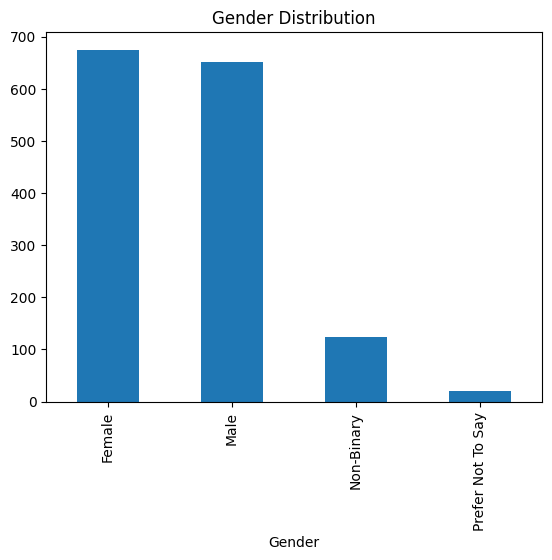

In [316]:
data['Gender'].value_counts().plot(kind='bar', title='Gender Distribution');

#  Age Distribution

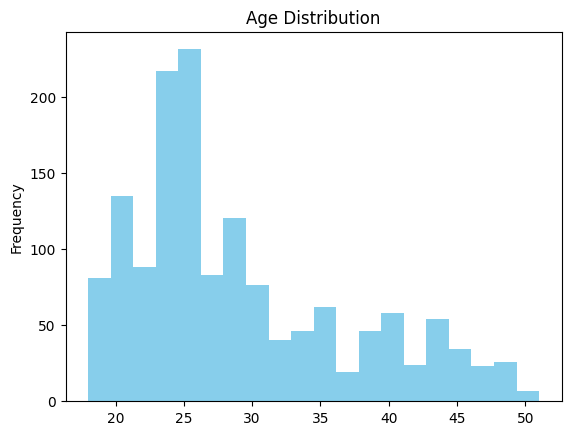

In [317]:
data['Age'].plot(kind='hist', bins=20, title='Age Distribution', color='skyblue');


#  Ethnicity Breakdown

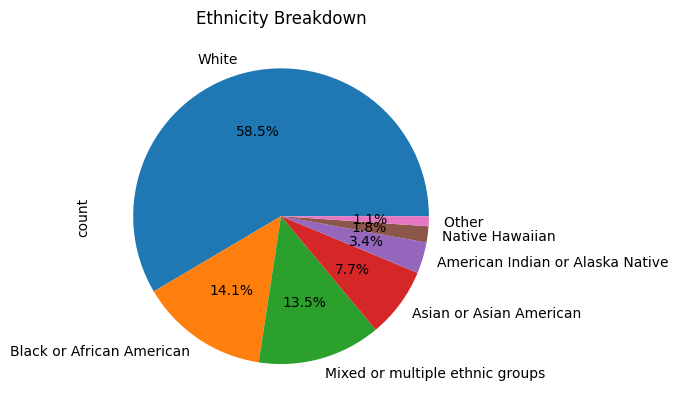

In [318]:
data['Ethnicity'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Ethnicity Breakdown');


# Education Levels

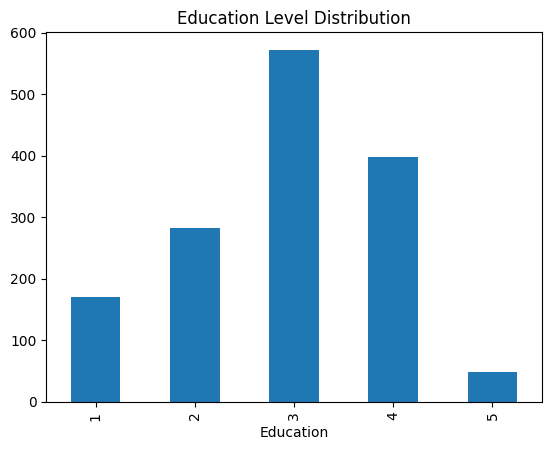

In [319]:
data['Education'].value_counts().sort_index().plot(kind='bar', title='Education Level Distribution');


#  Marital Status

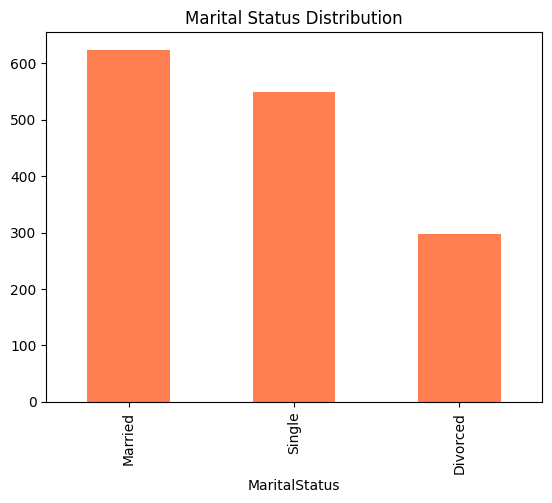

In [320]:
data['MaritalStatus'].value_counts().plot(kind='bar', title='Marital Status Distribution', color='coral');


# Department-wise Employee Count

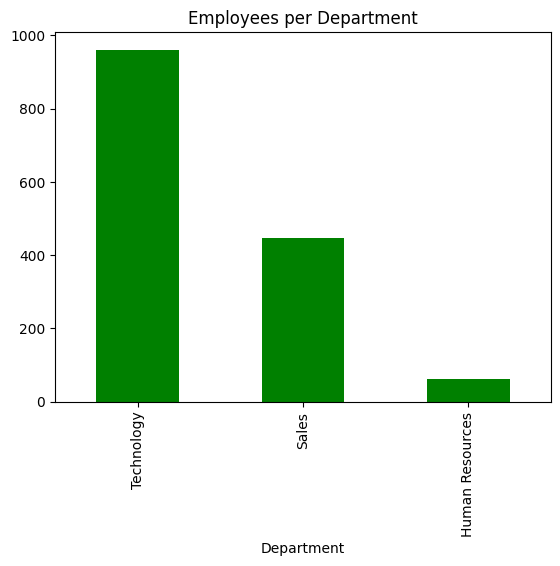

In [321]:
data['Department'].value_counts().plot(kind='bar', title='Employees per Department', color='green');


#  Job Role Distribution

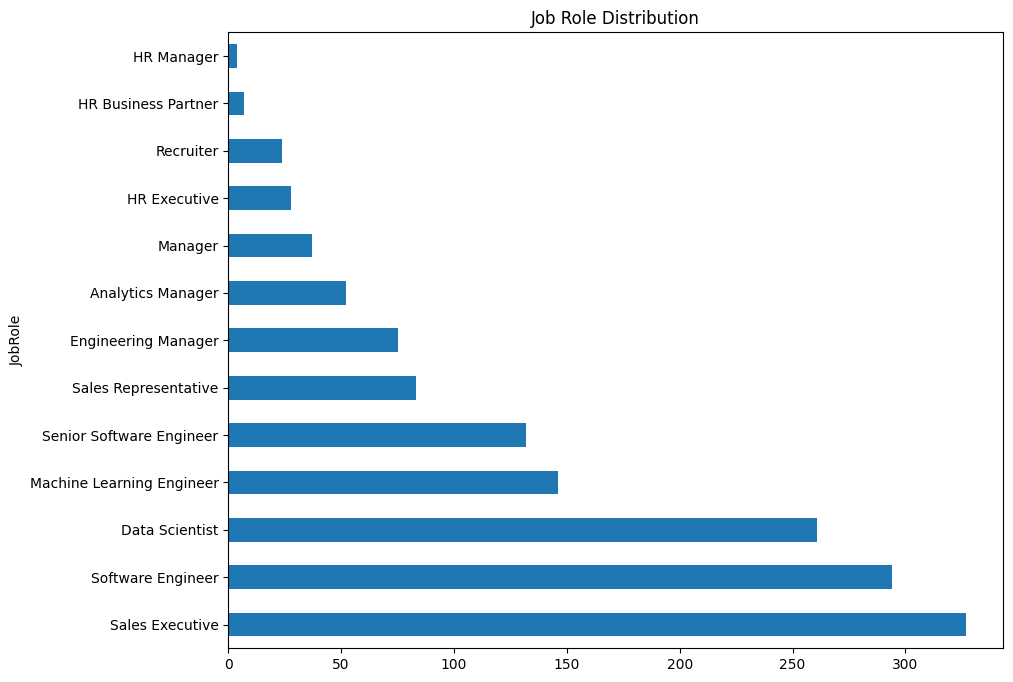

In [322]:
data['JobRole'].value_counts().plot(kind='barh', title='Job Role Distribution', figsize=(10,8));

#  Business Travel Frequency

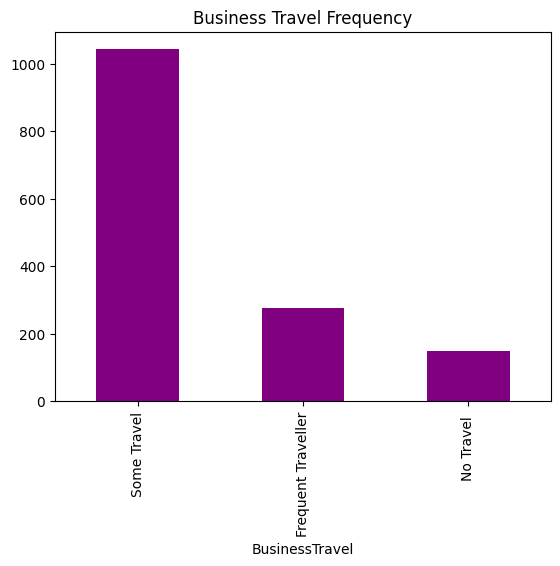

In [323]:
data['BusinessTravel'].value_counts().plot(kind='bar', title='Business Travel Frequency', color='purple');


#  Years at Company Distribution

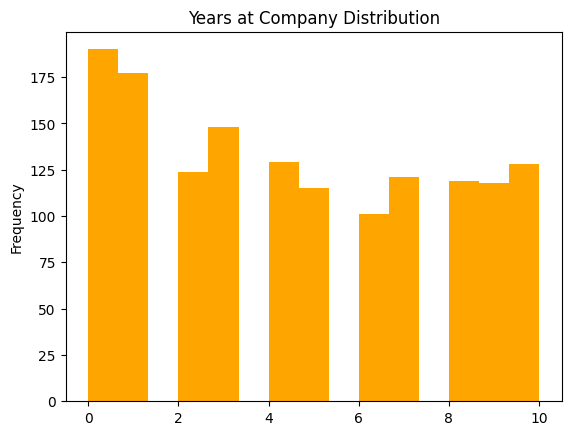

In [324]:
data['YearsAtCompany'].plot(kind='hist', bins=15, title='Years at Company Distribution', color='orange');

#  Years Since Last Promotion

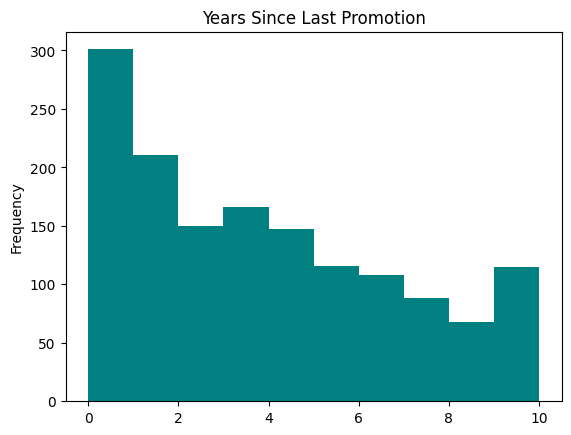

In [325]:
data['YearsSinceLastPromotion'].plot(kind='hist', bins=10, title='Years Since Last Promotion', color='teal');


#  Salary Distribution

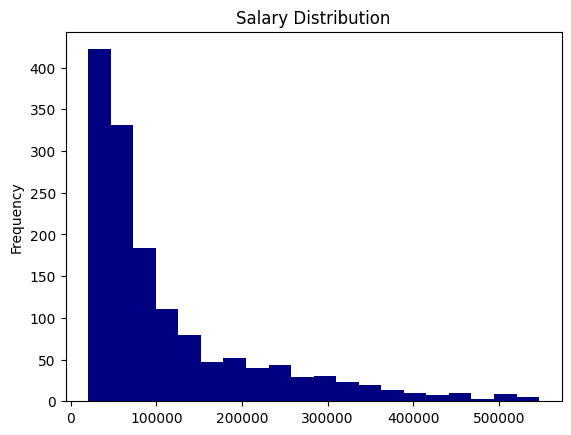

In [326]:
data['Salary'].plot(kind='hist', bins=20, title='Salary Distribution', color='navy');


# Salary by Department

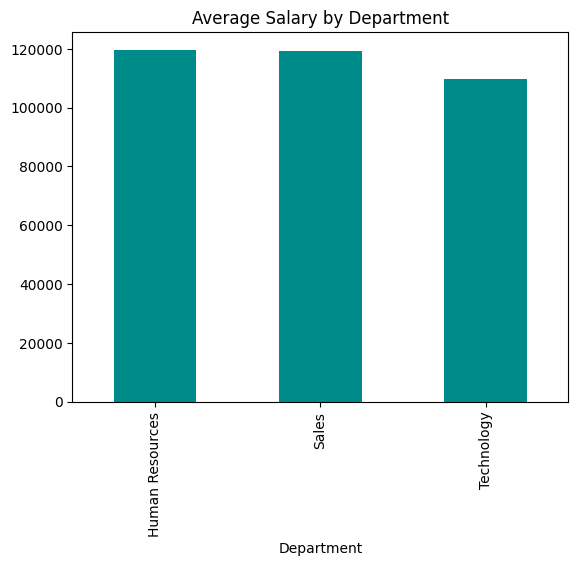

In [327]:
data.groupby('Department')['Salary'].mean().plot(kind='bar', title='Average Salary by Department', color='darkcyan');


# Salary by Job Role

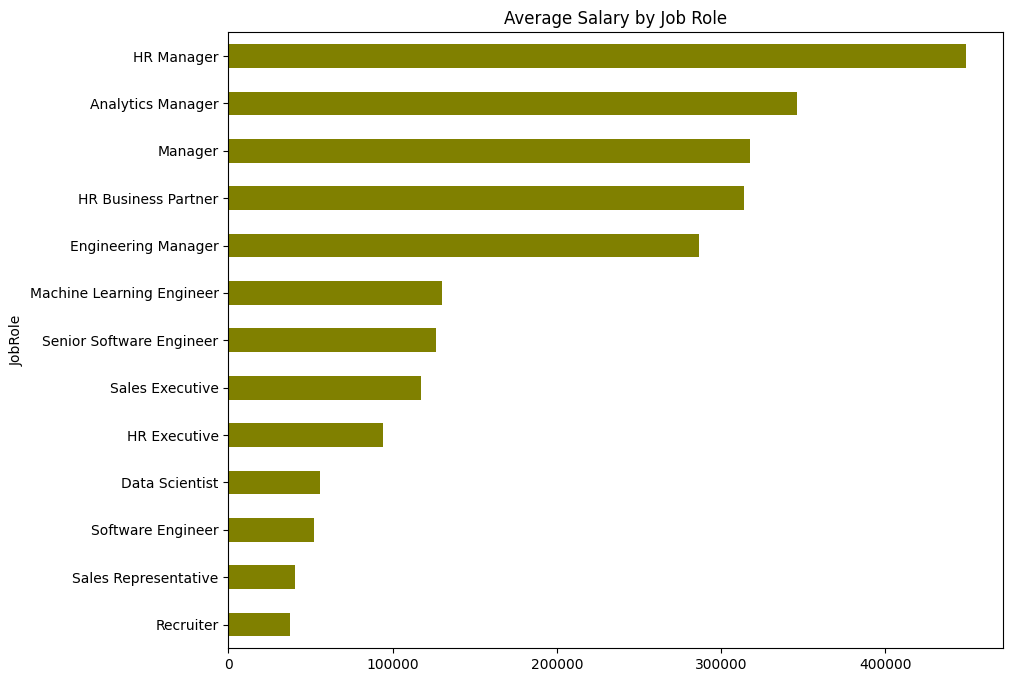

In [328]:
data.groupby('JobRole')['Salary'].mean().sort_values().plot(kind='barh', title='Average Salary by Job Role', figsize=(10,8), color='olive');


# Salary vs. Years at Company

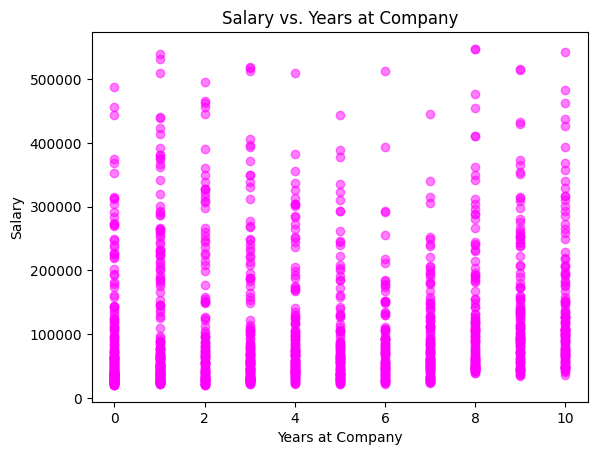

In [329]:
plt.scatter(data['YearsAtCompany'], data['Salary'], alpha=0.5, color='magenta')
plt.title('Salary vs. Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Salary')
plt.show()


# Overall Attrition Rate

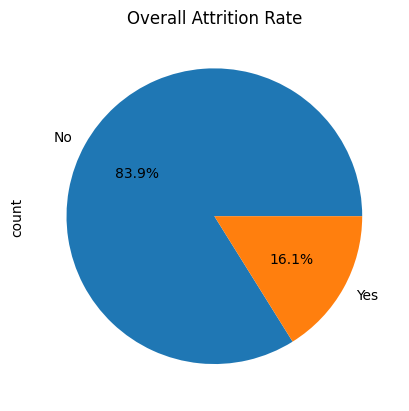

In [330]:
data['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Overall Attrition Rate');


# Attrition by Department

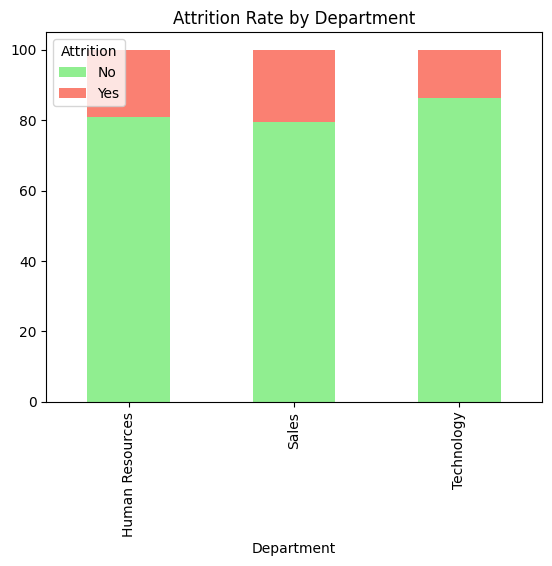

In [331]:
attrition_by_dept = data.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100
attrition_by_dept.plot(kind='bar', stacked=True, title='Attrition Rate by Department', color=['lightgreen', 'salmon']);


# Attrition vs. Overtime

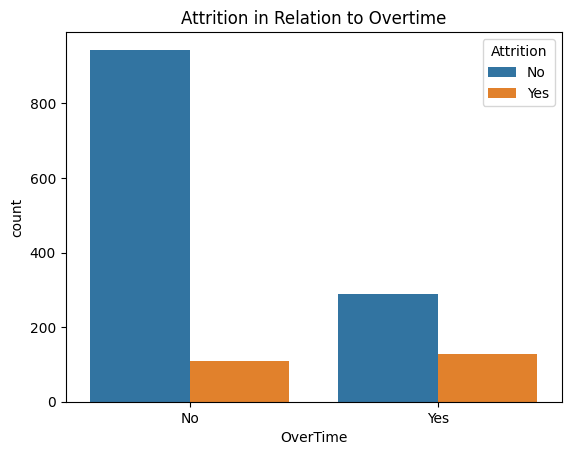

In [332]:
sns.countplot(x='OverTime', hue='Attrition', data=data)
plt.title('Attrition in Relation to Overtime');

# Attrition vs. Salary

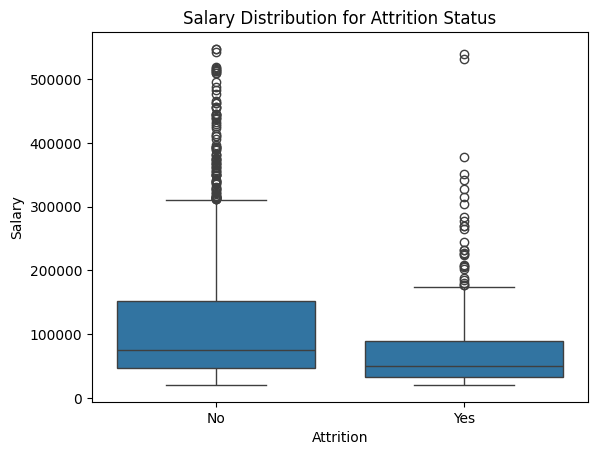

In [333]:
sns.boxplot(x='Attrition', y='Salary', data=data)
plt.title('Salary Distribution for Attrition Status');


# Attrition vs. Years Since Last Promotion

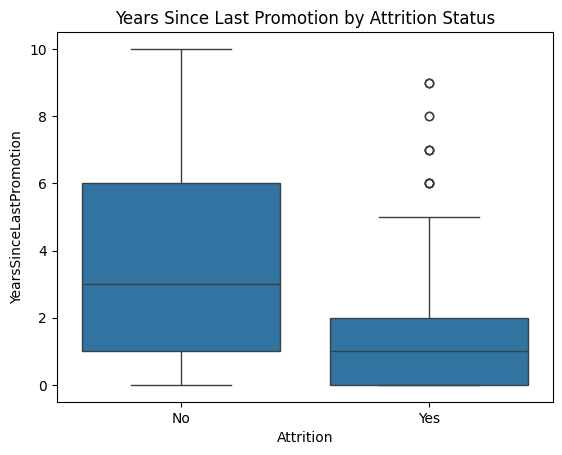

In [334]:
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=data)
plt.title('Years Since Last Promotion by Attrition Status');


# Correlation Heatmap

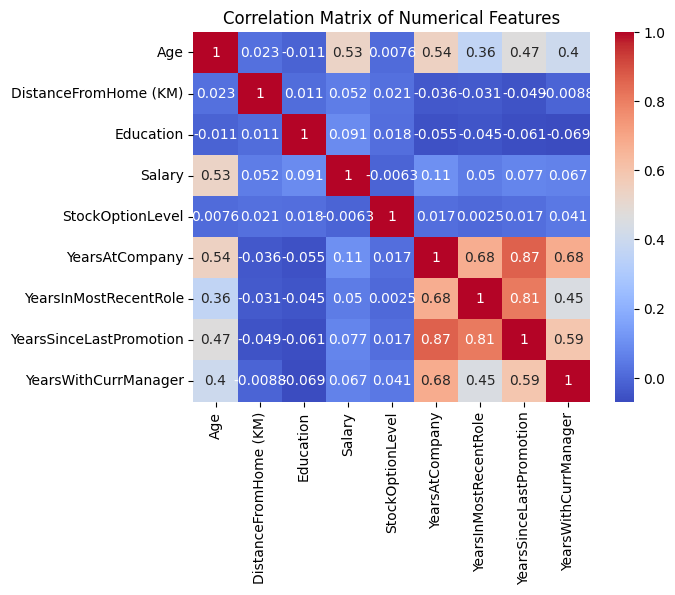

In [335]:
numeric_cols = ['Age', 'DistanceFromHome (KM)', 'Education', 'Salary', 'StockOptionLevel', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features');


In [336]:
data

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,...,Single,38508,0,No,2022-12-26,No,0,0,0,0
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,...,Single,92995,3,No,2022-12-30,No,0,0,0,0
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,...,Single,63375,0,No,2022-12-30,No,0,0,0,0
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,Married,46521,0,No,2022-12-30,No,0,0,0,0


# Data model Building

In [337]:
data.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


# Import Libraries

In [338]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

In [339]:
data.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [340]:
categorical_cols = ['Gender', 'BusinessTravel', 'Department', 'State', 
                    'Ethnicity','EducationField', 'JobRole', 
                    'MaritalStatus', 'OverTime']

In [341]:
cat=data.select_dtypes('object')
cat

,EmployeeID,FirstName,LastName,Gender,BusinessTravel,Department,State,Ethnicity,EducationField,JobRole,MaritalStatus,OverTime,Attrition
0,3012-1A41,Leonelle,Simco,Female,Some Travel,Sales,IL,White,Marketing,Sales Executive,Divorced,No,No
1,CBCB-9C9D,Leonerd,Aland,Male,Some Travel,Sales,CA,White,Marketing,Sales Executive,Single,Yes,No
2,95D7-1CE9,Ahmed,Sykes,Male,Some Travel,Human Resources,CA,Asian or Asian American,Marketing,HR Business Partner,Married,No,No
3,47A0-559B,Ermentrude,Berrie,Non-Binary,Some Travel,Technology,IL,White,Computer Science,Engineering Manager,Married,No,No
4,42CC-040A,Stace,Savege,Female,Some Travel,Human Resources,CA,White,Technical Degree,Recruiter,Single,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,Some Travel,Technology,CA,Black or African American,Computer Science,Software Engineer,Single,No,No
1466,6FB9-A624,Marc,Calver,Non-Binary,Some Travel,Technology,CA,Black or African American,Business Studies,Senior Software Engineer,Single,No,No
1467,EBF4-5928,Rudolph,MacDearmont,Male,Some Travel,Sales,CA,Black or African American,Marketing,Sales Executive,Single,No,No
1468,60E6-B1D9,Merill,Agg,Male,Some Travel,Technology,CA,Black or African American,Information Systems,Data Scientist,Married,No,No


In [342]:
from scipy.stats import chi2_contingency
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['Attrition'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-Square test between 'Attrition' and '{col}': p-value = {p}")

Chi-Square test between 'Attrition' and 'Gender': p-value = 0.16553489004194544
Chi-Square test between 'Attrition' and 'BusinessTravel': p-value = 5.608614476449931e-06
Chi-Square test between 'Attrition' and 'Department': p-value = 0.004525606574479634
Chi-Square test between 'Attrition' and 'State': p-value = 0.21759493558747248
Chi-Square test between 'Attrition' and 'Ethnicity': p-value = 0.8582053939739726
Chi-Square test between 'Attrition' and 'EducationField': p-value = 0.008363170391067572
Chi-Square test between 'Attrition' and 'JobRole': p-value = 2.1898966200983104e-14
Chi-Square test between 'Attrition' and 'MaritalStatus': p-value = 3.229218243754594e-08
Chi-Square test between 'Attrition' and 'OverTime': p-value = 8.158423721538322e-21


# Interpretation of P-Values
* P-Value < 0.05: Indicates a statistically significant association between 'Attrition' and the feature. This means the feature is likely relevant for predicting 'Attrition'.
* P-Value ≥ 0.05: Indicates that the association is not statistically significant. The feature may not be as relevant for predicting 'Attrition'.

* Features like BusinessTravel, JobRole, OverTime, and MaritalStatus have very low p-values and should be considered as strong predictors for 'Attrition'.
* Features like Department, EducationField, though significant, might have weaker associations. Depending on model performance,  may decide to keep or exclude them.
* Features with high p-values (e.g., Gender, State, Ethnicity) might not contribute much to the model. 

In [343]:
data['Attrition'].replace({'No':0,'Yes':1},inplace=True)
# data.drop(columns=['EmployeeID'],inplace=True)

In [344]:
numeric_data = data.select_dtypes(include=['number'])

In [345]:
correlation_matrix = numeric_data.corr()
correlation_matrix

,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.022892,-0.011168,0.529227,0.007587,-0.134413,0.543169,0.364278,0.466852,0.402946
DistanceFromHome (KM),0.022892,1.000000,0.010706,0.052306,0.020537,-0.009843,-0.035646,-0.031279,-0.049069,-0.008842
Education,-0.011168,0.010706,1.000000,0.090907,0.018422,-0.031373,-0.055386,-0.044887,-0.060612,-0.068794
Salary,0.529227,0.052306,0.090907,1.000000,-0.006282,-0.130263,0.106143,0.049874,0.076502,0.067176
StockOptionLevel,0.007587,0.020537,0.018422,-0.006282,1.000000,-0.137145,0.016878,0.002466,0.016701,0.040987
Attrition,-0.134413,-0.009843,-0.031373,-0.130263,-0.137145,1.000000,-0.284964,-0.224829,-0.297491,-0.219889
YearsAtCompany,0.543169,-0.035646,-0.055386,0.106143,0.016878,-0.284964,1.000000,0.677218,0.865577,0.679402
YearsInMostRecentRole,0.364278,-0.031279,-0.044887,0.049874,0.002466,-0.224829,0.677218,1.000000,0.811353,0.450421
YearsSinceLastPromotion,0.466852,-0.049069,-0.060612,0.076502,0.016701,-0.297491,0.865577,0.811353,1.000000,0.592631
YearsWithCurrManager,0.402946,-0.008842,-0.068794,0.067176,0.040987,-0.219889,0.679402,0.450421,0.592631,1.000000


In [346]:
# correlation_matrix = data.corr()
# correlation_matrix

In [347]:
correlation_with_target = correlation_matrix['Attrition'].sort_values(ascending=False)
print(correlation_with_target)

Attrition                  1.000000
DistanceFromHome (KM)     -0.009843
Education                 -0.031373
Salary                    -0.130263
Age                       -0.134413
StockOptionLevel          -0.137145
YearsWithCurrManager      -0.219889
YearsInMostRecentRole     -0.224829
YearsAtCompany            -0.284964
YearsSinceLastPromotion   -0.297491
Name: Attrition, dtype: float64


* The feature YearsSinceLastPromotion has the strongest negative correlation with 'Attrition', indicating that employees who have not been promoted recently are more likely to leave.

* Features like DistanceFromHome and Education have very weak correlations with 'Attrition', suggesting they have minimal impact.

In [348]:
x=data.iloc[:,4:]

In [349]:
x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [350]:
x.drop(columns=['HireDate','Attrition','State','Ethnicity', 'Education','EducationField','DistanceFromHome (KM)','StockOptionLevel','YearsWithCurrManager'],inplace=True)

In [351]:
x

,Age,BusinessTravel,Department,JobRole,MaritalStatus,Salary,OverTime,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion
0,30,Some Travel,Sales,Sales Executive,Divorced,102059,No,10,4,9
1,38,Some Travel,Sales,Sales Executive,Single,157718,Yes,10,6,10
2,43,Some Travel,Human Resources,HR Business Partner,Married,309964,No,10,6,10
3,39,Some Travel,Technology,Engineering Manager,Married,293132,No,10,10,10
4,29,Some Travel,Human Resources,Recruiter,Single,49606,No,6,1,1
...,...,...,...,...,...,...,...,...,...,...
1465,20,Some Travel,Technology,Software Engineer,Single,38508,No,0,0,0
1466,27,Some Travel,Technology,Senior Software Engineer,Single,92995,No,0,0,0
1467,21,Some Travel,Sales,Sales Executive,Single,63375,No,0,0,0
1468,21,Some Travel,Technology,Data Scientist,Married,46521,No,0,0,0


In [352]:
# from sklearn.preprocessing import OneHotEncoder
# # Initialize OneHotEncoder
# encoder = OneHotEncoder(drop='first',handle_unknown='ignore')
# # Fit on the training data
# encoder.fit(x)
# x

In [353]:
# x_new

In [354]:
X = pd.get_dummies(x, drop_first=True)
X

,Age,Salary,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,BusinessTravel_No Travel,BusinessTravel_Some Travel,Department_Sales,Department_Technology,JobRole_Data Scientist,...,JobRole_Machine Learning Engineer,JobRole_Manager,JobRole_Recruiter,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_Senior Software Engineer,JobRole_Software Engineer,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,30,102059,10,4,9,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1,38,157718,10,6,10,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,True
2,43,309964,10,6,10,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,39,293132,10,10,10,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,29,49606,6,1,1,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,20,38508,0,0,0,False,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1466,27,92995,0,0,0,False,True,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1467,21,63375,0,0,0,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1468,21,46521,0,0,0,False,True,False,True,True,...,False,False,False,False,False,False,False,True,False,False


In [355]:
y=data['Attrition']
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [356]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [357]:
x_train.reset_index(drop=True)

,Age,Salary,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,BusinessTravel_No Travel,BusinessTravel_Some Travel,Department_Sales,Department_Technology,JobRole_Data Scientist,...,JobRole_Machine Learning Engineer,JobRole_Manager,JobRole_Recruiter,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_Senior Software Engineer,JobRole_Software Engineer,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,23,29490,2,0,1,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,23,25500,5,5,5,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,30,42045,6,0,3,False,True,False,True,True,...,False,False,False,False,False,False,False,True,False,True
3,21,73075,2,1,1,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,21,34024,0,0,0,False,True,False,True,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,21,61345,1,0,0,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1172,31,183057,1,1,1,False,True,True,False,False,...,False,False,False,True,False,False,False,True,False,False
1173,24,35199,4,0,0,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1174,19,26973,0,0,0,False,True,False,True,True,...,False,False,False,False,False,False,False,False,True,False


In [358]:
x_train.nunique()

Age                                    33
Salary                               1166
YearsAtCompany                         11
YearsInMostRecentRole                  11
YearsSinceLastPromotion                11
BusinessTravel_No Travel                2
BusinessTravel_Some Travel              2
Department_Sales                        2
Department_Technology                   2
JobRole_Data Scientist                  2
JobRole_Engineering Manager             2
JobRole_HR Business Partner             2
JobRole_HR Executive                    2
JobRole_HR Manager                      2
JobRole_Machine Learning Engineer       2
JobRole_Manager                         2
JobRole_Recruiter                       2
JobRole_Sales Executive                 2
JobRole_Sales Representative            2
JobRole_Senior Software Engineer        2
JobRole_Software Engineer               2
MaritalStatus_Married                   2
MaritalStatus_Single                    2
OverTime_Yes                      

In [359]:
data['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [360]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
x_test_smote,y_test_smote=smote.fit_resample(x_test, y_test)                                             

In [361]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_smote)
X_test=scaler.transform(x_test_smote)

In [362]:
x_train=pd.DataFrame(X_train,columns=X_train_smote.columns)
x_test=pd.DataFrame(X_test,columns=X_train_smote.columns)

In [363]:
x_train

,Age,Salary,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,BusinessTravel_No Travel,BusinessTravel_Some Travel,Department_Sales,Department_Technology,JobRole_Data Scientist,...,JobRole_Machine Learning Engineer,JobRole_Manager,JobRole_Recruiter,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_Senior Software Engineer,JobRole_Software Engineer,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,-0.648698,-0.761955,-0.461335,-0.716874,-0.512776,-0.253592,0.830790,-0.556800,0.933713,2.418321,...,-0.251335,-0.121732,-0.092918,-0.45449,-0.216601,-0.249062,-0.396664,-0.633682,-0.707107,-0.621990
1,-0.648698,-0.807283,0.501746,1.495920,0.935834,-0.253592,0.830790,-0.556800,0.933713,-0.413510,...,-0.251335,-0.121732,-0.092918,-0.45449,-0.216601,-0.249062,2.521023,-0.633682,-0.707107,-0.621990
2,0.339165,-0.619327,0.822773,-0.716874,0.211529,-0.253592,0.830790,-0.556800,0.933713,2.418321,...,-0.251335,-0.121732,-0.092918,-0.45449,-0.216601,-0.249062,-0.396664,1.578079,-0.707107,1.607743
3,-0.930945,-0.266817,-0.461335,-0.274315,-0.512776,-0.253592,0.830790,-0.556800,0.933713,-0.413510,...,-0.251335,-0.121732,-0.092918,-0.45449,-0.216601,-0.249062,2.521023,-0.633682,-0.707107,-0.621990
4,-0.930945,-0.710448,-1.103389,-0.716874,-0.874928,-0.253592,0.830790,-0.556800,0.933713,2.418321,...,-0.251335,-0.121732,-0.092918,-0.45449,-0.216601,-0.249062,-0.396664,1.578079,-0.707107,-0.621990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,-0.930945,-0.776406,-0.461335,-0.274315,-0.512776,-0.253592,-1.203673,-0.556800,0.933713,-0.413510,...,-0.251335,-0.121732,-0.092918,-0.45449,-0.216601,-0.249062,-0.396664,-0.633682,-0.707107,-0.621990
1982,-0.366452,-0.451342,-0.782362,-0.716874,-0.874928,-0.253592,0.830790,-0.556800,-1.070993,-0.413510,...,-0.251335,-0.121732,-0.092918,-0.45449,-0.216601,-0.249062,-0.396664,-0.633682,1.414214,-0.621990
1983,-0.507575,-0.839103,-0.782362,-0.716874,-0.874928,-0.253592,-1.203673,-0.556800,-1.070993,-0.413510,...,-0.251335,-0.121732,-0.092918,-0.45449,-0.216601,-0.249062,-0.396664,-0.633682,-0.707107,1.607743
1984,1.891521,2.656107,-0.140308,-0.274315,0.211529,-0.253592,-1.203673,1.795977,-1.070993,-0.413510,...,-0.251335,-0.121732,-0.092918,-0.45449,-0.216601,-0.249062,-0.396664,-0.633682,-0.707107,-0.621990


In [364]:
x_test

,Age,Salary,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,BusinessTravel_No Travel,BusinessTravel_Some Travel,Department_Sales,Department_Technology,JobRole_Data Scientist,...,JobRole_Machine Learning Engineer,JobRole_Manager,JobRole_Recruiter,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_Senior Software Engineer,JobRole_Software Engineer,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,-0.930945,-0.841193,-0.782362,-0.716874,-0.874928,-0.253592,0.830790,-0.556800,0.933713,-0.41351,...,-0.251335,-0.121732,-0.092918,-0.454490,-0.216601,-0.249062,2.521023,-0.633682,1.414214,1.607743
1,1.185904,2.294736,1.785854,1.053362,0.573682,-0.253592,0.830790,1.795977,-1.070993,-0.41351,...,-0.251335,-0.121732,-0.092918,2.200267,-0.216601,-0.249062,-0.396664,1.578079,-0.707107,1.607743
2,-0.507575,-0.118826,-1.103389,-0.716874,-0.874928,-0.253592,0.830790,1.795977,-1.070993,-0.41351,...,-0.251335,-0.121732,-0.092918,2.200267,-0.216601,-0.249062,-0.396664,1.578079,-0.707107,1.607743
3,1.044781,-0.425736,2.106882,0.168244,2.022291,-0.253592,0.830790,-0.556800,0.933713,-0.41351,...,-0.251335,-0.121732,-0.092918,-0.454490,-0.216601,-0.249062,2.521023,1.578079,-0.707107,1.607743
4,0.621411,0.167362,1.785854,0.168244,2.384444,3.943349,-1.203673,-0.556800,0.933713,-0.41351,...,-0.251335,-0.121732,-0.092918,-0.454490,-0.216601,-0.249062,2.521023,1.578079,-0.707107,-0.621990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-1.072068,-0.840273,-0.782362,-0.716874,-0.874928,-0.253592,0.830790,-0.556800,0.933713,-0.41351,...,-0.251335,-0.121732,-0.092918,-0.454490,-0.216601,-0.249062,2.521023,-0.633682,1.414214,1.607743
476,-0.507575,-0.474563,-0.461335,-0.716874,-0.874928,-0.253592,-1.203673,1.795977,-1.070993,-0.41351,...,-0.251335,-0.121732,-0.092918,2.200267,-0.216601,-0.249062,-0.396664,-0.633682,-0.707107,-0.621990
477,-0.507575,-0.517436,-1.103389,-0.716874,-0.874928,-0.253592,0.830790,-0.556800,-1.070993,-0.41351,...,-0.251335,-0.121732,-0.092918,-0.454490,-0.216601,-0.249062,-0.396664,-0.633682,-0.707107,1.607743
478,-0.507575,-0.747425,-1.103389,-0.716874,-0.874928,-0.253592,0.830790,-0.556800,-1.070993,-0.41351,...,-0.251335,-0.121732,-0.092918,-0.454490,-0.216601,-0.249062,-0.396664,-0.633682,1.414214,-0.621990


In [365]:
print(y_train_smote.value_counts())

Attrition
0    993
1    993
Name: count, dtype: int64


In [366]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train_smote)

RandomForestClassifier(random_state=42)

In [367]:
y_pred=model.predict(x_test)

In [368]:
print(classification_report(y_test_smote, y_pred))
print("Accuracy:", accuracy_score(y_test_smote, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       240
           1       0.91      0.78      0.84       240

    accuracy                           0.85       480
   macro avg       0.86      0.85      0.85       480
weighted avg       0.86      0.85      0.85       480

Accuracy: 0.8520833333333333


In [369]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}
def evaluate_models(models, x_train, y_train,x_test,y_test):
    results = {}
    for name, model in models.items():
        print(f"Evaluating {name}")
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        scores = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted'),
            'recall': recall_score(y_test, y_pred, average='weighted'),
            'f1': f1_score(y_test, y_pred, average='weighted')
        }

        print(f"{name} - Accuracy: {scores['accuracy']:.4f}, Precision: {scores['precision']:.4f}, "
              f"Recall: {scores['recall']:.4f}, F1 Score: {scores['f1']:.4f}")

        results[name] = scores
        print('=====================================================================================')

    return results

In [370]:
results = evaluate_models(models, x_train, y_train_smote,x_test,y_test_smote)

Evaluating Logistic Regression
Logistic Regression - Accuracy: 0.8438, Precision: 0.8442, Recall: 0.8438, F1 Score: 0.8437
Evaluating Random Forest
Random Forest - Accuracy: 0.8396, Precision: 0.8470, Recall: 0.8396, F1 Score: 0.8387
Evaluating Support Vector Machine
Support Vector Machine - Accuracy: 0.8521, Precision: 0.8543, Recall: 0.8521, F1 Score: 0.8519
Evaluating Decision Tree
Decision Tree - Accuracy: 0.8021, Precision: 0.8060, Recall: 0.8021, F1 Score: 0.8015


# RandomizedSearchCV

In [371]:
from sklearn.model_selection import RandomizedSearchCV

In [372]:
# Define the parameter grid
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [373]:
# Create the RandomizedSearchCV object
RF=RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=RF, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

In [374]:
# # Fit the model to the data
random_search.fit(x_train, y_train_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='accuracy', verbose=2)

In [375]:
# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

In [376]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'criterion': 'gini', 'bootstrap': False}
Best Score: 0.9079477994506538


In [377]:
# Best model evaluation
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)

In [378]:
accuracy= accuracy_score(y_test_smote, y_pred)
accuracy

0.8479166666666667

# GridSearchCV

In [379]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200, 250,300],  # Number of trees
    'max_depth': [50,70,80,90],  # Tree depth
    'min_samples_split': [ 5, 6,7],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2],    # Minimum samples in a leaf
    'max_features': ['sqrt'], # Number of features to consider for best split
    'bootstrap': [True],       # Whether bootstrap samples are used
    'criterion': ['gini']  # Split criterion
}

In [380]:
# Instantiate GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


In [381]:
# Fit the model on training data
grid_search.fit(x_train, y_train_smote)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': [50, 70, 80, 90],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [5, 6, 7],
                         'n_estimators': [200, 250, 300]},
             scoring='accuracy', verbose=2)

In [382]:
# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 200}
Best Score: 0.9079477994506538


In [383]:
# Best model evaluation
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(x_test)

In [384]:
accuracy= accuracy_score(y_test_smote, y_pred)
accuracy

0.8416666666666667

In [385]:
 import pickle
with open('model_1.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

with open('scaler_1.pkl','wb')as file:
    pickle.dump(scaler,file)

In [386]:
training_columns=['Age', 'Salary', 'YearsAtCompany', 'YearsInMostRecentRole',
       'YearsSinceLastPromotion', 'BusinessTravel_No Travel ',
       'BusinessTravel_Some Travel', 'Department_Sales',
       'Department_Technology', 'JobRole_Data Scientist',
       'JobRole_Engineering Manager', 'JobRole_HR Business Partner',
       'JobRole_HR Executive', 'JobRole_HR Manager',
       'JobRole_Machine Learning Engineer', 'JobRole_Manager',
       'JobRole_Recruiter', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobRole_Senior Software Engineer',
       'JobRole_Software Engineer', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes']

with open('columns.pkl','wb')as file:
    pickle.dump(training_columns,file)

with open('columns.pkl','rb') as file:
    training_columns=pickle.load(file)

In [387]:
# Load the model from the file
with open('model_1.pkl', 'rb') as file:
    model = pickle.load(file)

In [388]:
with open('scaler_1.pkl','rb') as file:
    scaler=pickle.load(file)

# Model Evaluation

In [389]:
new_data=[[30,'Frequent Traveller','Sales','Sales Executive','Single',50000,'Yes',5,2,1]]
new=[[29 ,'Some Travel' ,'Human Resources','Recruiter',' Single',49606, 'No',6,1, 1]]

In [390]:
columns = ['Age', 'BusinessTravel', 'Department', 'JobRole', 'MaritalStatus',
           'Salary', 'OverTime', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion']

new_df = pd.DataFrame(new_data, columns=columns)

In [391]:
new_df

,Age,BusinessTravel,Department,JobRole,MaritalStatus,Salary,OverTime,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion
0,30,Frequent Traveller,Sales,Sales Executive,Single,50000,Yes,5,2,1


In [392]:
X_new = pd.get_dummies(new_df)

In [393]:
X_new

,Age,Salary,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,BusinessTravel_Frequent Traveller,Department_Sales,JobRole_Sales Executive,MaritalStatus_Single,OverTime_Yes
0,30,50000,5,2,1,True,True,True,True,True


In [394]:
x_train.columns

Index(['Age', 'Salary', 'YearsAtCompany', 'YearsInMostRecentRole',
       'YearsSinceLastPromotion', 'BusinessTravel_No Travel ',
       'BusinessTravel_Some Travel', 'Department_Sales',
       'Department_Technology', 'JobRole_Data Scientist',
       'JobRole_Engineering Manager', 'JobRole_HR Business Partner',
       'JobRole_HR Executive', 'JobRole_HR Manager',
       'JobRole_Machine Learning Engineer', 'JobRole_Manager',
       'JobRole_Recruiter', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobRole_Senior Software Engineer',
       'JobRole_Software Engineer', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')

In [395]:
# Add missing columns from the training set
missing_cols = set(x_train.columns) - set(X_new.columns)
for col in missing_cols:
    X_new[col] = 0 

In [396]:
# Reorder columns to match the training data
X_new = X_new.reindex(columns=training_columns, fill_value=0)
# X_new = X_new[training_columns]

In [397]:
X_new

,Age,Salary,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,BusinessTravel_No Travel,BusinessTravel_Some Travel,Department_Sales,Department_Technology,JobRole_Data Scientist,...,JobRole_Machine Learning Engineer,JobRole_Manager,JobRole_Recruiter,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_Senior Software Engineer,JobRole_Software Engineer,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,30,50000,5,2,1,0,0,True,0,0,...,0,0,0,True,0,0,0,0,True,True


In [398]:
X_new_scaled = scaler.transform(X_new)

# 7. Make predictions
y_pred_new = model.predict(X_new_scaled)

# 8. Print the predicted class
print(f'Predicted class: {y_pred_new[0]}')

Predicted class: 1


In [399]:
data.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,0,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,0,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,0,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,0,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,1,6,1,1,6


In [400]:
data[data['Attrition']==0]

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,0,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,0,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,0,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,0,10,10,10,0
5,C219-6C2E,Clerkclaude,Hinkins,Male,34,Some Travel,Sales,30,NY,Mixed or multiple ethnic groups,...,Divorced,133468,1,No,2012-01-05,0,10,3,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,...,Single,38508,0,No,2022-12-26,0,0,0,0,0
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,...,Single,92995,3,No,2022-12-30,0,0,0,0,0
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,...,Single,63375,0,No,2022-12-30,0,0,0,0,0
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,Married,46521,0,No,2022-12-30,0,0,0,0,0


In [401]:
columns = ['Age', 'BusinessTravel', 'Department', 'JobRole', 'MaritalStatus',
           'Salary', 'OverTime', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion']
training_columns=['Age', 'Salary', 'YearsAtCompany', 'YearsInMostRecentRole',
       'YearsSinceLastPromotion', 'BusinessTravel_No Travel ',
       'BusinessTravel_Some Travel', 'Department_Sales',
       'Department_Technology', 'JobRole_Data Scientist',
       'JobRole_Engineering Manager', 'JobRole_HR Business Partner',
       'JobRole_HR Executive', 'JobRole_HR Manager',
       'JobRole_Machine Learning Engineer', 'JobRole_Manager',
       'JobRole_Recruiter', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobRole_Senior Software Engineer',
       'JobRole_Software Engineer', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes']
def evaluate_model_on_new_data(model, scaler, new_data, columns, training_columns):
    new_df = pd.DataFrame(new_data, columns=columns)
    print('Dataframe :')
    print(new_df)
    print('===========================================================================')

    # 3. Apply one-hot encoding
    X_new = pd.get_dummies(new_df)
    print('After One_hot :')
    print(X_new)
    print('==========================-================================================')

    # 4. Add missing columns from the training set
    missing_cols = set(training_columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0  # Add missing columns with zeros

    # Reorder columns to match the training data
    X_new = X_new[training_columns]

    # 5. Scale the new data using the same scaler used in training
    X_new_scaled = scaler.transform(X_new)
    print('Scaled_data :')
    print(X_new_scaled)
    print('===========================================================================')

    # 6. Make predictions
    y_pred_new = model.predict(X_new_scaled)
    
    if y_pred_new == 1:
        result = "likely to leave the company"
    else:
        result = "likely to stay with the company"
    print('############################################################################')
    # 7. Return the predicted class
    return result


In [415]:
new_data=[[30,'Frequent Traveller','Sales','Sales Executive','Single',50000,'Yes',5,2,1]]
new_data2=[[43 ,'Some Travel' ,'Human Resources','Recruiter',' Married',309964, 'No',10,6, 10]]
new_data3=[[30,'Frequent Traveller','Sales','Sales Executive','Single',50000,'Yes',5,2,1]]
new_data4=[[38 ,'Some Travel' ,'Sales','Sales Executive',' Single',157718, 'Yes',10,6,10]]

In [416]:
evaluate_model_on_new_data(model,scaler,new_data,columns,training_columns)

Dataframe :
   Age      BusinessTravel Department          JobRole MaritalStatus  Salary  \
0   30  Frequent Traveller      Sales  Sales Executive        Single   50000   

  OverTime  YearsAtCompany  YearsInMostRecentRole  YearsSinceLastPromotion  
0      Yes               5                      2                        1  
After One_hot :
   Age  Salary  YearsAtCompany  YearsInMostRecentRole  \
0   30   50000               5                      2   

   YearsSinceLastPromotion  BusinessTravel_Frequent Traveller  \
0                        1                               True   

   Department_Sales  JobRole_Sales Executive  MaritalStatus_Single  \
0              True                     True                  True   

   OverTime_Yes  
0          True  
==========================-================================================
Scaled_data :
[[ 0.33916483 -0.52895567  0.50174622  0.1682437  -0.5127758  -0.25359156
  -1.20367296  1.79597659 -1.07099348 -0.41351006 -0.17497869 -0.05504

'likely to leave the company'

In [417]:
evaluate_model_on_new_data(model,scaler,new_data2,columns,training_columns)

Dataframe :
   Age BusinessTravel       Department    JobRole MaritalStatus  Salary  \
0   43    Some Travel  Human Resources  Recruiter       Married  309964   

  OverTime  YearsAtCompany  YearsInMostRecentRole  YearsSinceLastPromotion  
0       No              10                      6                       10  
After One_hot :
   Age  Salary  YearsAtCompany  YearsInMostRecentRole  \
0   43  309964              10                      6   

   YearsSinceLastPromotion  BusinessTravel_Some Travel  \
0                       10                        True   

   Department_Human Resources  JobRole_Recruiter  MaritalStatus_ Married  \
0                        True               True                    True   

   OverTime_No  
0         True  
==========================-================================================
Scaled_data :
[[ 2.1737673   2.42431173  2.10688151  1.93847942  2.74659638 -0.25359156
   0.83079045 -0.55680013 -1.07099348 -0.41351006 -0.17497869 -0.05504819
  -0.10824

'likely to stay with the company'

In [418]:
evaluate_model_on_new_data(model,scaler,new_data3,columns,training_columns)

Dataframe :
   Age      BusinessTravel Department          JobRole MaritalStatus  Salary  \
0   30  Frequent Traveller      Sales  Sales Executive        Single   50000   

  OverTime  YearsAtCompany  YearsInMostRecentRole  YearsSinceLastPromotion  
0      Yes               5                      2                        1  
After One_hot :
   Age  Salary  YearsAtCompany  YearsInMostRecentRole  \
0   30   50000               5                      2   

   YearsSinceLastPromotion  BusinessTravel_Frequent Traveller  \
0                        1                               True   

   Department_Sales  JobRole_Sales Executive  MaritalStatus_Single  \
0              True                     True                  True   

   OverTime_Yes  
0          True  
==========================-================================================
Scaled_data :
[[ 0.33916483 -0.52895567  0.50174622  0.1682437  -0.5127758  -0.25359156
  -1.20367296  1.79597659 -1.07099348 -0.41351006 -0.17497869 -0.05504

'likely to leave the company'

In [419]:
evaluate_model_on_new_data(model,scaler,new_data4,columns,training_columns)

Dataframe :
   Age BusinessTravel Department          JobRole MaritalStatus  Salary  \
0   38    Some Travel      Sales  Sales Executive        Single  157718   

  OverTime  YearsAtCompany  YearsInMostRecentRole  YearsSinceLastPromotion  
0      Yes              10                      6                       10  
After One_hot :
   Age  Salary  YearsAtCompany  YearsInMostRecentRole  \
0   38  157718              10                      6   

   YearsSinceLastPromotion  BusinessTravel_Some Travel  Department_Sales  \
0                       10                        True              True   

   JobRole_Sales Executive  MaritalStatus_ Single  OverTime_Yes  
0                     True                   True          True  
==========================-================================================
Scaled_data :
[[ 1.46815097  0.69475245  2.10688151  1.93847942  2.74659638 -0.25359156
   0.83079045  1.79597659 -1.07099348 -0.41351006 -0.17497869 -0.05504819
  -0.10824398 -0.03175003 -0.

'likely to stay with the company'

In [408]:
data

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,0,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,0,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,0,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,0,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,1,6,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,...,Single,38508,0,No,2022-12-26,0,0,0,0,0
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,...,Single,92995,3,No,2022-12-30,0,0,0,0,0
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,...,Single,63375,0,No,2022-12-30,0,0,0,0,0
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,Married,46521,0,No,2022-12-30,0,0,0,0,0
